# Ejercicio/Tarea 4

### Rafael Martínez Martínez

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raiz.

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`, recordando que hay que llamar a las funciones con un punto `f.(x)`.
    * Combinar las dos formas en una sola rutina, aqui será necesario poner un condicional `if` que verifique de que tipo es el _input_.
    * Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo) inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        
__Nota:__ Se resolveran dudas de esta tarea el Jueves 24, así que traten de avanzar para que surjan dudas.

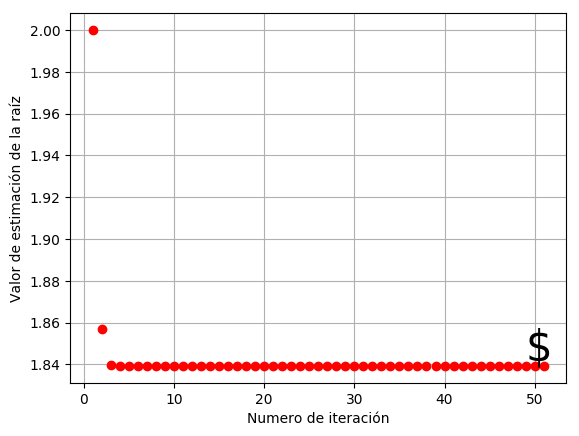

51-element Array{Float64,1}:
 2.0    
 1.85714
 1.83954
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 ⋮      
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [5]:
using SymPy
using PyPlot
x=Sym("x")
f=x^3 - x^2 - x - 1;

"""
Esta funcion recibe dos argumentos la función f a encontrar su raíz y 
la condicion inicial x0
Suponemos que la funcion f es simbolica dependiente de la variable x 
"""
function Newton(f,x0)
    
    fp=simplify(diff(f,x))
    r=Float64[]
    push!(r, x0)
    fn=lambdify(f,[x]);
    fpn=lambdify(fp,[x]);
    cont=1
    while abs(fn(x0))>0.000001 || cont<=50
        if fpn(x0)!=0
            x0=x0-(fn(x0)/fpn(x0))
            push!(r, x0)
        else
            println("El metodo no funciona")
        end
        cont=cont+1
    end
    n=1:length(r)
    plot(n,r,"ro")
    grid("on")
    xlabel("Numero de iteración")
    ylabel("Valor de estimación de la raíz")
    annotate(L"$",xy=[1;0],
	xycoords="axes fraction",
	xytext=[-10,10],
	textcoords="offset points",
	fontsize=30.0,
	ha="right",
	va="bottom")
    return r
end

a=Newton(f,2)
a